 # Thoracic Surgery Data Set

This Data set is taken from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data#

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark")
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

### Load the Data

I downladed the data file to my local machine. I coud not figure out how to download the arff file directly from the web. 

In [2]:
#Data is in an arff file
data = arff.loadarff('thoracic.arff')

Load the data into a pandas dataframe and take a look at the first five rows. 

In [3]:
df = pd.DataFrame(data[0])

df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'


### Clean up the data

Hmmm. Pulled the data in fine but we have a lot of cleanup to do: 
- All those b's need to go away. 
- There are a few categorical features. 
- My T's and F's should be 0's and 1's. 

Let's work on the b's first. 
All of the data types need to be strings to change them, so let's do that first.  

In [4]:
df[['DGN','PRE6','PRE7', 'PRE8','PRE9', 'PRE10','PRE11','PRE14', 'PRE17', 'PRE19','PRE25', 'PRE30','PRE32', 'Risk1Yr']] \
= df[['DGN','PRE6','PRE7', 'PRE8','PRE9', 'PRE10','PRE11','PRE14', 'PRE17', 'PRE19','PRE25', 'PRE30','PRE32', 'Risk1Yr']].astype(str)

In [5]:
#Replace all the F and T values with 0 and 1
df.replace(["b\'F\'", "b\'T\'"],[0,1], inplace=True, regex=True)

Get rid of the single quotes and remaining b's

In [6]:
df.replace(["b\'","\'"], "", inplace=True, regex=True)

In [7]:
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60.0,0
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59.0,0
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54.0,0
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73.0,1


Now let's deal with the categorical features (all the stuff that's not a number). 
We'll set up dummy variables for each of the features and then assign a 0 or 1 to it. 

In [8]:
dummies  = pd.get_dummies(df[['DGN', 'PRE6', 'PRE14']])

- Now we have a dataframe with the dummy variables with binary values.
- We then need to merge it with our dataframe.

In [9]:
df1 = pd.concat([df,dummies], axis=1)

In [10]:
df1.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,...,DGN_DGN5,DGN_DGN6,DGN_DGN8,PRE6_PRZ0,PRE6_PRZ1,PRE6_PRZ2,PRE14_OC11,PRE14_OC12,PRE14_OC13,PRE14_OC14
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,...,0,0,0,0,1,0,0,0,0,1
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,...,0,0,0,1,0,0,0,1,0,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,...,0,0,0,0,1,0,1,0,0,0
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,...,0,0,0,1,0,0,1,0,0,0
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,...,0,0,0,0,0,1,1,0,0,0


Now we need to drop the old categorical variables

In [11]:
df1 = df1.drop(columns=['DGN', 'PRE6', 'PRE14'])

Scale the PRE4 and PRE5 to all be between 0 and 1. 

In [12]:
scaler = MinMaxScaler()
df1[['PRE4', 'PRE5', 'AGE']] = scaler.fit_transform(df1[['PRE4', 'PRE5', 'AGE']])

In [13]:
df1.head()

,PRE4,PRE5,PRE7,PRE8,PRE9,PRE10,PRE11,PRE17,PRE19,PRE25,...,DGN_DGN5,DGN_DGN6,DGN_DGN8,PRE6_PRZ0,PRE6_PRZ1,PRE6_PRZ2,PRE14_OC11,PRE14_OC12,PRE14_OC13,PRE14_OC14
0,0.296296,0.014061,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.403292,0.010780,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0.271605,0.013124,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0.460905,0.024373,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.205761,0.000000,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [15]:
df1[['PRE4', 'PRE5', 'AGE']].describe()

,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000
mean,0.378938,0.042286,0.629304
std,0.179299,0.137894,0.131923
min,0.000000,0.000000,0.000000
25%,0.238683,0.011718,0.545455
50%,0.353909,0.016874,0.621212
75%,0.487140,0.024842,0.727273
max,1.000000,1.000000,1.000000


### Visualization

In [16]:
print(df1.groupby('Risk1Yr').size())

Risk1Yr
0    400
1     70
dtype: int64


Risk1Yr is True (1) if they died after 1 year and False (0) if they survived. This is an imbalanced data set; there are a lot more survivors (0) than fatalities (1). This is common in many problems (medical, fraud detection, etc). With our data set survival is at about 85%. So just stating that someone will survive gives you an 85% chance of being right, based on the data.

<AxesSubplot:>

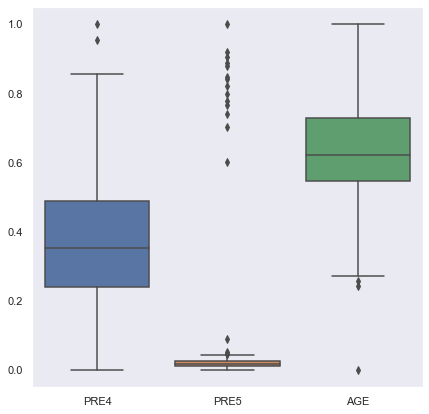

In [17]:
# Boxplot
fig = plt.figure(figsize = (7,7))
sns.boxplot(data=df1[['PRE4', 'PRE5', 'AGE']])

/var/folders/q1/4btflrxj44q2zx926gdsvlz00000gp/T/ipykernel_26523/2801873113.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df1[['AGE','PRE4', 'PRE5']].hist(ax=ax)


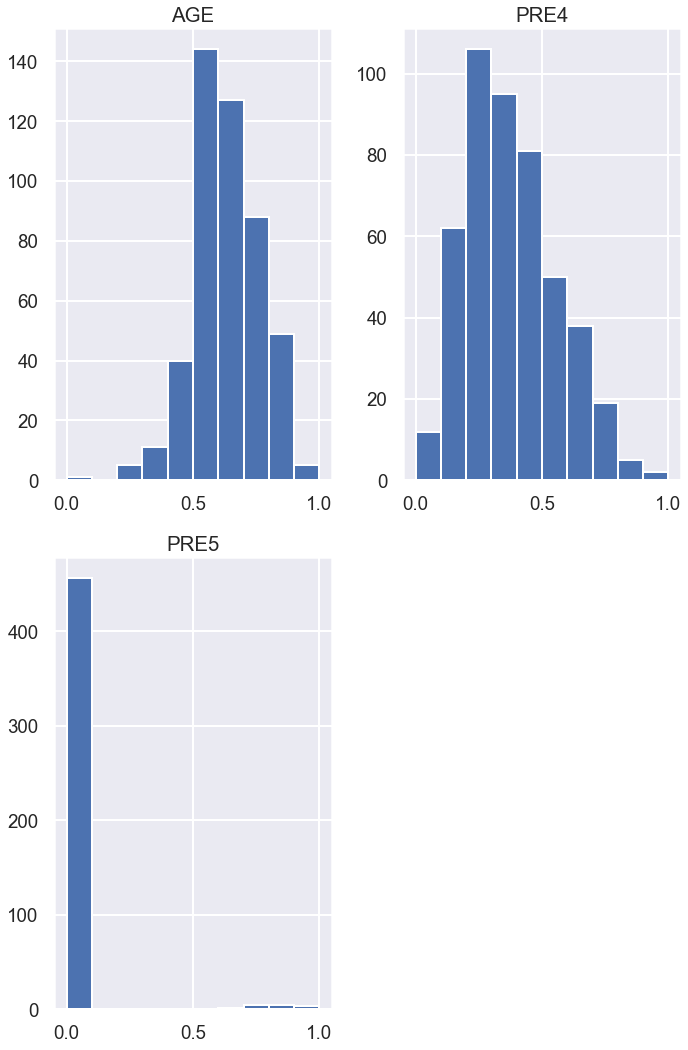

In [18]:
sns.set_context("poster", font_scale=0.85)

fig = plt.figure(figsize = (10,15))
ax = fig.gca()

df1[['AGE','PRE4', 'PRE5']].hist(ax=ax)
#fig = plt.subplots(figsize=(15,10))
fig = plt.tight_layout()

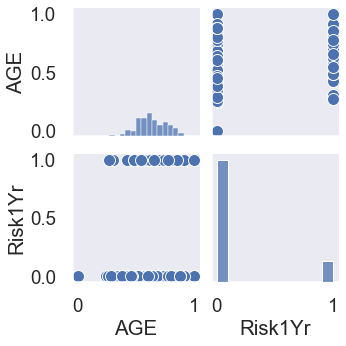

In [19]:
sns.pairplot(df1, vars = ["AGE", "Risk1Yr"])

Let's look at the correlation of the variables to each other.

<AxesSubplot:>

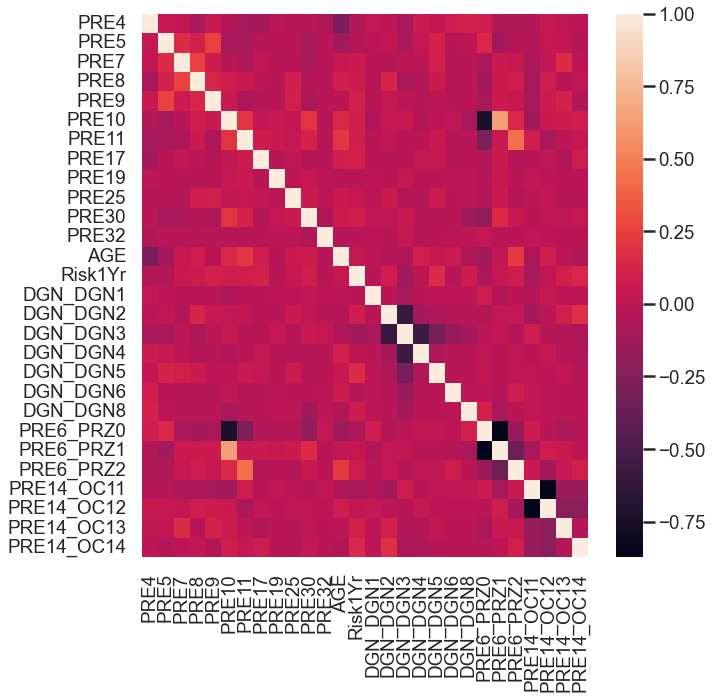

In [20]:
# calculate the correlation matrix
corr = df1.corr()

fig = plt.figure(figsize = (10,10))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Train the algorithm

Let's try to work the problem with Logistic Regression. We have a binary classification problem. 

Split the data set into test and validation data sets.

In [21]:
array = df1.values
X = df1.drop('Risk1Yr', axis=1).values
Y = df1['Risk1Yr'].values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

Initialize and train the model

In [22]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [23]:
# predict class labels for the test set
predicted = model.predict(X_validation)

ROC AUC is the Area Under the Receiver Operating Characteristic Curve. This is a good way to evaluate binary clasifiers, especially ones with imbabanced data sets. It measeures how well the model works. 1 is a perfect score and 0.5 would be the same as a random guess.  

In [25]:
seed = 7
scoring = 'roc_auc'

from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(cv_results.mean())

0.6662892336022284


In [26]:
confusion_matrix(Y_validation, predicted)

array([[82,  1],
       [10,  1]])

In [27]:
y_pred = model.predict(X)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_validation, predicted, target_names=['Surv', 'Death']))

              precision    recall  f1-score   support

        Surv       0.89      0.99      0.94        83
       Death       0.50      0.09      0.15        11

    accuracy                           0.88        94
   macro avg       0.70      0.54      0.55        94
weighted avg       0.85      0.88      0.85        94



**Remember: 0 is survivial after one year and 1 is death after one year.** To interpret the confusion matrix: In 82 cases we predicted 0 and it was 0. In 1 instance we predicted 1 and it was actually 0. In 10 cases we predicted 0 and it was 1. In 1 case we predicted 1 and it was actaully 1. 

Our model is not performaing too well. What else can we do?

### What are some things we can do to imrove our predictions:
- Tune the model parameters
- Try some different classifiers (decision tree, random forest, SVM, etc)
- Get or create more samples to balance the data set
- Exclude some of the majority samples to balance the data set better
